In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def G2(d):
    return 1-4*d
def G3(d,dr_ri,):
    return np.sqrt((1-2*d)**2+(d*dr_ri)**2)
def G5(d,ri,dr_dphi):
    return 1-4*d*(1/ri)*(dr_dphi)**2
def G7(d,ri,dr_dphi,dr_ri):
    return np.sqrt((1-2*d-4*d*dr_dphi**2/ri**2)**2+(dr_ri*d)**2)

a=1.16*10**-5
ri = 0.02
ro = 0.05
dt = 1/100
dr = (ro-ri)/20
dphi = 360/40
dr_ri = dr/ri
dr_dphi = dr/dphi
d = a*dt/dr**2
G2(d),G3(d,dr_ri),G5(d,ri,dr_dphi),G7(d,ri,dr_dphi,dr_ri)


(0.7937777777777778,
 0.8968972238352936,
 0.9999997135802469,
 0.8968829029807276)

## Explicit Method

In [3]:
Tin= 10.0
Nphi, Nr =4,2
T = np.array([[Tin]*(Nphi)]*(Nr+1))

T=T[1:,1:]
T

array([[10., 10., 10.],
       [10., 10., 10.]])

In [4]:
a=1.16*10**-5
a

1.16e-05

In [5]:
dt = 2/100
dt

0.02

In [6]:
T = np.full((3, 2),30.0)
T[0]

array([30., 30.])

In [56]:
def Explicit(Nr=10, Nphi=100, Tin=200.0, tstps= 100):
    a=1.16*10**-5
    ri, ro = 0.02, 0.05
    dt = 1/100.0
    dr = (ro-ri)/Nr
    dphi = 2*np.pi/Nphi
    dr_ri, dr_dphi = dr/ri, dr/dphi
    d = a*dt/dr**2
    k = 45.0
    Ta, Tw= 20.0, 5.0
    ha, hw = 50.0, 250.0
    
    T = np.full((Nr+1,Nphi),Tin)
    for stp in range(tstps):
        T_prev = T.copy()
        for i in range(1,Nr):
            r = ri + (i)*dr
            for j in range( Nphi):
                jf = (j+1)%(Nphi)
                jp = (j-1)%(Nphi)
                T[i][j] = T_prev[i][j] + d*((T_prev[i+1][j] - 2*T_prev[i][j] + T_prev[i-1][j]) + (0.5*dr/r)*(T_prev[i+1][j]-T_prev[i-1][j])
                                            +(dr_dphi**2/r**2)*(T_prev[i][jf]-2*T_prev[i][j]+T_prev[i][jp]))
        # Inner Boundary condition
        # for j in range( Nphi):
        #         i = 0
        #         jf = (j+1)%(Nphi)
        #         jp = (j-1)%(Nphi)
        #         r = ri + (i)*dr
        #         T_d  = T_prev[i+1][j]
        #         T[i][j] = T_prev[i][j] + d*((T_prev[i+1][j] - 2*T_prev[i][j] + T_d ) + (0.5*dr/r)*(T_prev[i+1][j]-T_d )
        #                                     +(dr_dphi**2/r**2)*(T_prev[i][jf]-2*T_prev[i][j]+T_prev[i][jp]))
        T[0,:]=T[1,:]
        # Outer Boundary condition
        for j in range( Nphi):
            i = Nr 
            r = ri + (i)*dr
            jf = (j+1)%(Nphi)
            jp = (j-1)%(Nphi)
            if j <= Nphi//2:
                  T_d = -(2*dr*ha/k)*(T_prev[i][j]-Ta) + T_prev[i-1][j]
                  T[i][j] = T_prev[i][j] + d*((T_d - 2*T_prev[i][j] + T_prev[i-1][j]) + (0.5*dr/r)*(T_d-T_prev[i-1][j])
                                            +(dr_dphi**2/r**2)*(T_prev[i][jf]-2*T_prev[i][j]+T_prev[i][jp]))
            else:
                T_d = -(2*dr*hw/k)*(T_prev[i][j]-Tw) + T_prev[i-1][j]
                T[i][j] = T_prev[i][j] + d*((T_d - 2*T_prev[i][j] + T_prev[i-1][j]) + (0.5*dr/r)*(T_d-T_prev[i-1][j])
                                            +(dr_dphi**2/r**2)*(T_prev[i][jf]-2*T_prev[i][j]+T_prev[i][jp]))

        if stp % 100 == 0:
             print(f"Time step: {stp} seconds")
        if np.max(T)<100:
             print("Temprature reached 100")
             break        

    #plotting cylinder with temperature profile
    r, theta = np.meshgrid(np.linspace(ri, ro, Nr+1), np.linspace(0, 2 * np.pi, Nphi))

    x, y = r * np.cos(theta), r * np.sin(theta)
    
    colorinterpolation = 50
    colourMap = plt.cm.jet
    plt.figure(figsize=(7,5))
    plt.contourf(x,y,T.T,colorinterpolation, cmap=colourMap)
    plt.colorbar(label="Temperature (°C)")
    plt.title(f"Temperature Profile with grid size Time (Nr,Nphi) = {Nr,Nphi} at Time ={stp*dt}")
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.axis("equal")
    plt.plot([-ro, ro], [0, 0], 'k--', linewidth=1.5)
    plt.text(0, ro/2, "Air (20°C)", ha='center')
    plt.text(0, -ro/2, "Water (5°C)", ha='center')
    plt.show()
    


Time step: 0 seconds
Time step: 100 seconds
Time step: 200 seconds
Temprature reached 100


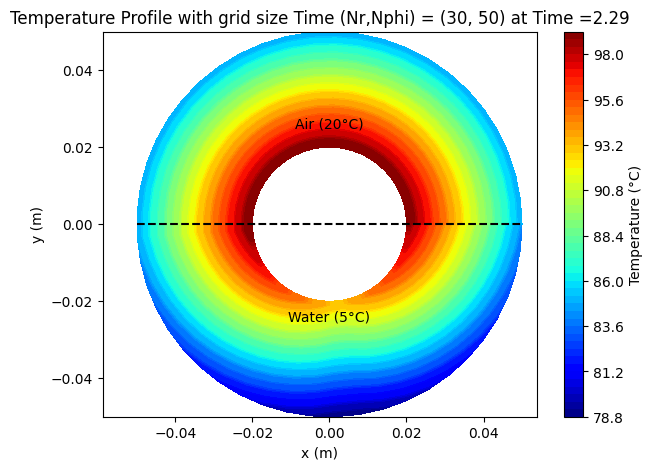

In [58]:
Explicit(Nr=30, Nphi=50, Tin=200, tstps= 100000)

In [36]:
dphi = 2*np.pi/50
dphi

0.12566370614359174

In [41]:
ri, ro = 0.02, 0.05
dt = 1/100.0
rs = np.linspace(ri, ro, Nr+1)
dr = rs[1] - rs[0]
phi = np.linspace(0, 2*np.pi, Nphi)
dphi = phi[1] - phi[0]
dr,dphi

(0.015000000000000003, 2.0943951023931953)